In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fft import fft, ifft, dct, fftfreq
from scipy.fft import rfft, rfftfreq
from scipy import signal
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [2]:
def read_THz(fname):
    df = pd.read_csv(fname, sep='\t') 
    time = np.array(df.values[:,0]).astype(float)
    pulse = np.array(df.values[:,1]).astype(float)
    return time, pulse 

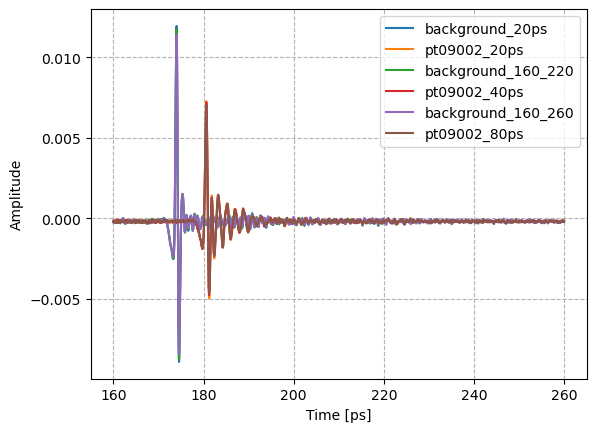

In [3]:
time_bkg, pulse_bkg = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_200\background_160_200__V_u.txt")
time_pc, pulse_pc = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_200\pt09002_160_200_rep1__V_u.txt")
time_bkg_2, pulse_bkg_2 = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_220\background_160_220____V_u.txt")
time_pc_2, pulse_pc_2 = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_220\pt09002_160_220_rep1__V_u.txt")
time_bkg_3, pulse_bkg_3 = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_260\background_160_260__V_u.txt")
time_pc_3, pulse_pc_3 = read_THz(r"C:\Users\prosp\Documents\FYS 203-JAN\LAB_THZ_DATA\2024_01_23\pt09002\160_260\pt09002_160_260_rep1__V_u.txt")

plt.figure()
plt.plot(time_bkg, pulse_bkg,label='background_20ps')
plt.plot(time_pc, pulse_pc,label='pt09002_20ps')
plt.plot(time_bkg_2, pulse_bkg_2,label='background_160_220')
plt.plot(time_pc_2, pulse_pc_2,label='pt09002_40ps')
plt.plot(time_bkg_3, pulse_bkg_3,label='background_160_260')
plt.plot(time_pc_3, pulse_pc_3,label='pt09002_80ps')
plt.xlabel('Time [ps]')
plt.ylabel('Amplitude') 
plt.grid(color=[0.7, 0.7, 0.7], linestyle='--')
plt.legend()

ValueError: x and y must have same first dimension, but have shapes (641,) and (961,)

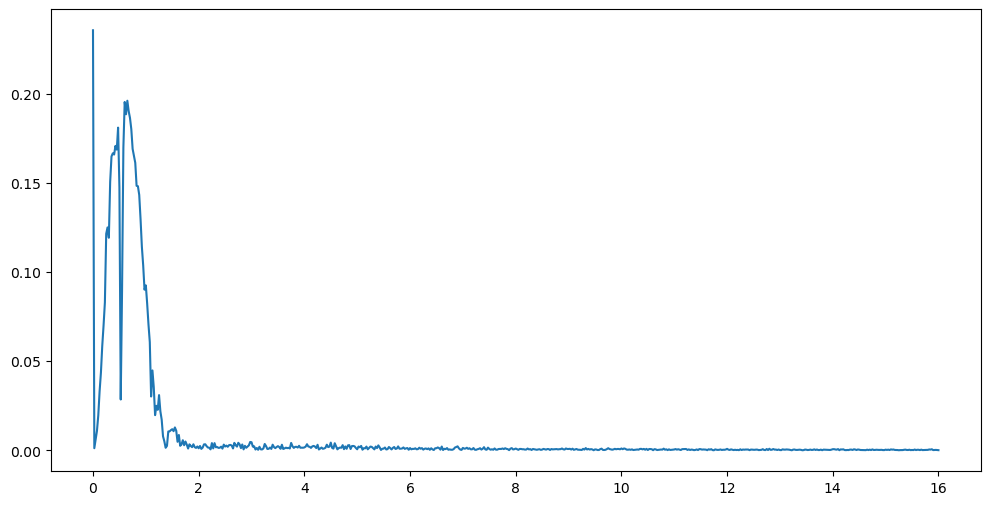

In [4]:
dt = time_bkg[1] - time_bkg[0]
freq = rfftfreq(len(time_bkg),dt)
polycarbonate_spectrum = np.abs(rfft(pulse_pc)) #convert time to freq
polycarbonate_spectrum_2= np.abs(rfft(pulse_pc_2)) 
polycarbonate_spectrum_3= np.abs(rfft(pulse_pc_3)) 
bkg_spectrum = np.abs(rfft(pulse_bkg))

plt.figure(figsize = (12,6))
plt.plot(freq, polycarbonate_spectrum , label = "pt09002_20ps")
plt.plot(freq, polycarbonate_spectrum_2, label = "pt09002_40ps")
plt.plot(freq, polycarbonate_spectrum_3, label = "pt09002_80ps")
plt.plot(freq, bkg_spectrum , label = "background")
           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.legend()

In [14]:
len(polycarbonate_spectrum)

641

In [13]:
len(polycarbonate_spectrum_2)

961

In [15]:
len(polycarbonate_spectrum_3)

1280

In [24]:
# Zero-padding to match the length
pad_length_2 = len(polycarbonate_spectrum) - len(polycarbonate_spectrum_2)
pad_length_3 = len(polycarbonate_spectrum) - len(polycarbonate_spectrum_3)
pad_length_bkg = len(polycarbonate_spectrum) - len(bkg_spectrum)

# Padding other spectra
polycarbonate_spectrum_2 = np.pad(polycarbonate_spectrum_2, (0, pad_length_2), mode='constant', constant_values=0)
polycarbonate_spectrum_3 = np.pad(polycarbonate_spectrum_3, (0, pad_length_3), mode='constant', constant_values=0)
bkg_spectrum = np.pad(bkg_spectrum, (0, pad_length_bkg), mode='constant', constant_values=0)


ValueError: index can't contain negative values

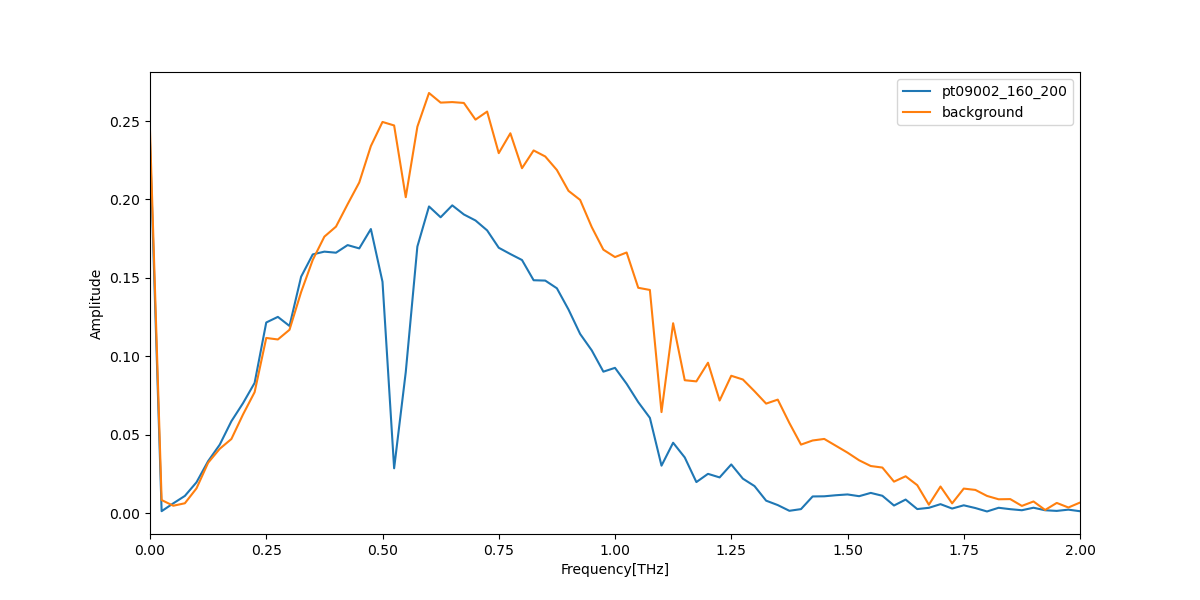

In [5]:
dt = time_bkg[1] - time_bkg[0]
freq = rfftfreq(len(time_bkg),dt)
polycarbonate_spectrum = np.abs(rfft(pulse_pc))   #convert time to freq
bkg_spectrum = np.abs(rfft(pulse_bkg))

plt.figure(figsize = (12,6))
plt.plot(freq, polycarbonate_spectrum , label = "pt09002_160_200")
plt.plot(freq, bkg_spectrum , label = "background")
           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Amplitude")
plt.xlim(0,2)
plt.legend()

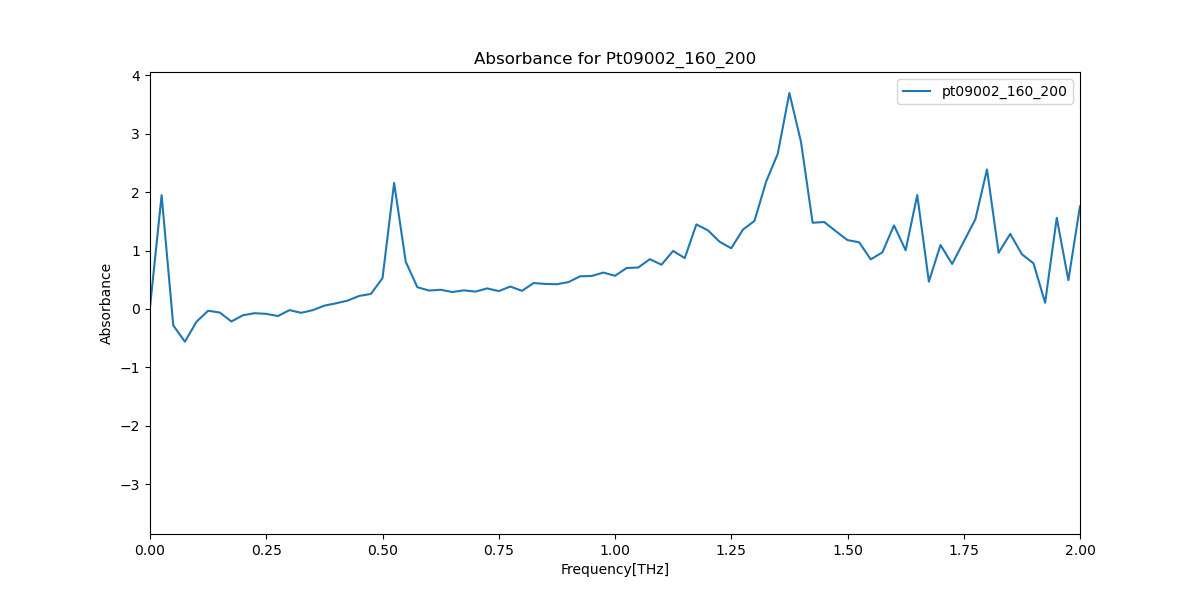

In [6]:
abs_pc = -np.log(polycarbonate_spectrum/bkg_spectrum)
plt.figure(figsize = (12,6))
plt.plot(freq, abs_pc , label = "pt09002_160_200")

           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Absorbance")
plt.title("Absorbance for Pt09002_160_200")
plt.xlim(0,2)
plt.legend()

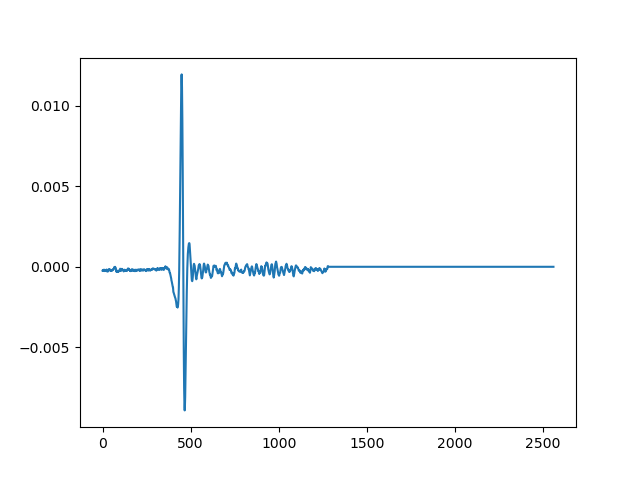

In [7]:
N = len(pulse_bkg)
pulse_bkg_zp = np.hstack((pulse_bkg,np.zeros(N)))
pulse_pc_zp = np.hstack((pulse_pc,np.zeros(N)))

plt.figure()
plt.plot(pulse_bkg_zp)

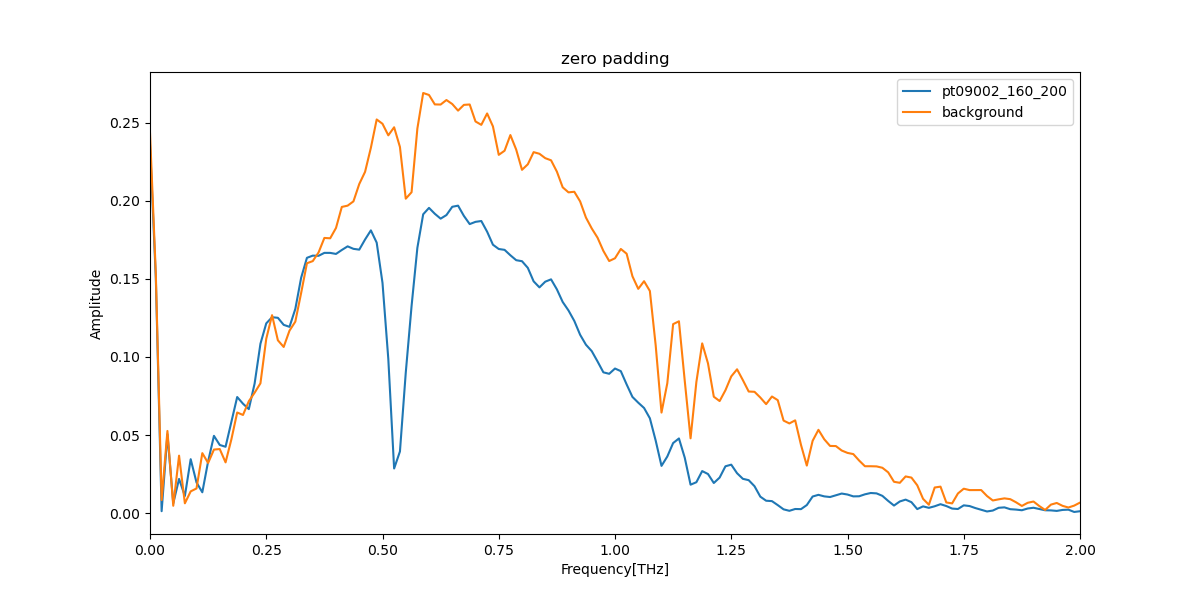

In [8]:
freq_zp = rfftfreq(len(pulse_bkg_zp),dt)


polycarbonate_spectrum_zp = np.abs(rfft(pulse_pc_zp))   #convert time to freq
bkg_spectrum_zp = np.abs(rfft(pulse_bkg_zp))

plt.figure(figsize = (12,6))
plt.plot(freq_zp, polycarbonate_spectrum_zp , label = "pt09002_160_200")
plt.plot(freq_zp, bkg_spectrum_zp , label = "background")
           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Amplitude")
plt.title("zero padding")
plt.xlim(0,2)
plt.legend()

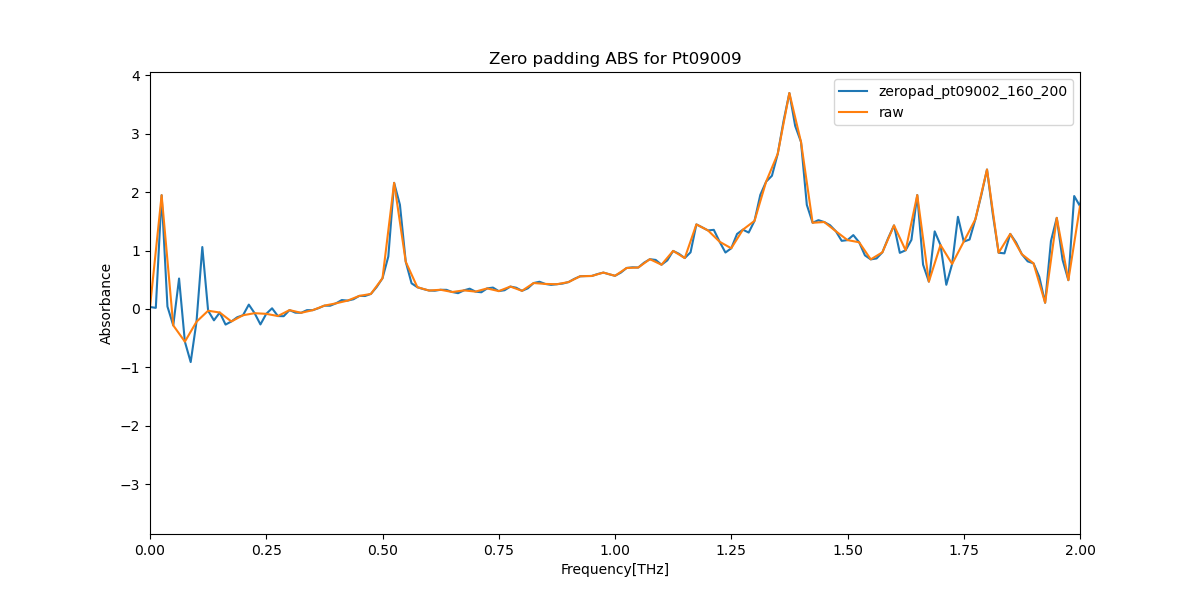

In [9]:
abs_pc_zp = -np.log(polycarbonate_spectrum_zp/bkg_spectrum_zp)
plt.figure(figsize = (12,6))
plt.plot(freq_zp, abs_pc_zp, label = "zeropad_pt09002_160_200")
plt.plot(freq, abs_pc , label = "raw")
          
plt.xlabel("Frequency[THz]")   
plt.ylabel("Absorbance")
plt.xlim(0,2)
plt.title("Zero padding ABS for Pt09009")
plt.legend()

C:\Users\prosp\AppData\Local\Temp\ipykernel_10304\552016791.py:5: DeprecationWarning: Importing blackmanharris from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackmanharris' or the convenience function 'scipy.signal.get_window' instead.
  window = signal.blackmanharris(window_size)


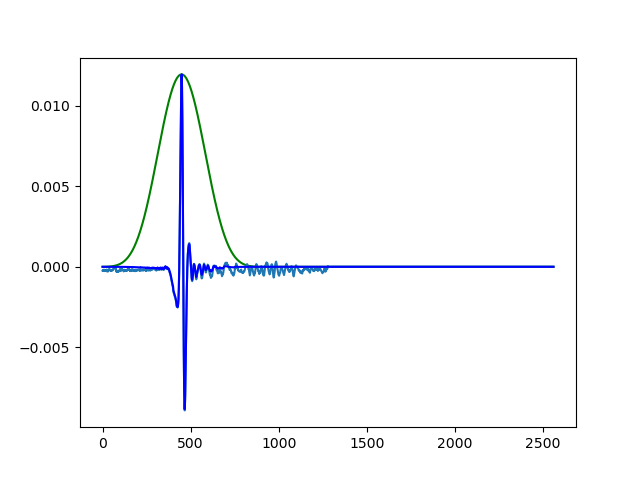

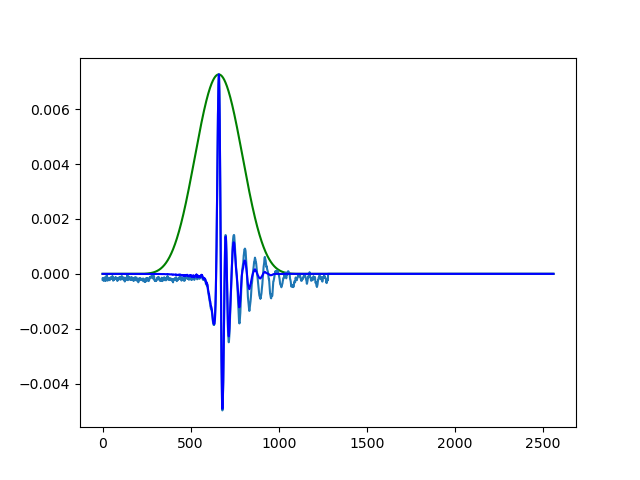

In [10]:
peak_pos_bkg = np.argmax(pulse_bkg_zp)
peak_pos_pc = np.argmax(pulse_pc_zp)

window_size = peak_pos_bkg * 2
window = signal.blackmanharris(window_size)

window_bkg = np.zeros(len(pulse_bkg_zp))
window_bkg[int(peak_pos_bkg-window_size/2): int(peak_pos_bkg+window_size/2)] = window
window_pc = np.zeros(len(pulse_pc_zp))
window_pc[int(peak_pos_pc-window_size/2): int(peak_pos_pc+window_size/2)] = window

plt.figure()
plt.plot(window_bkg*np.max(pulse_bkg_zp),"g")
plt.plot(pulse_bkg_zp)
plt.plot(window_bkg*pulse_bkg_zp,"b")


plt.figure()
plt.plot(window_pc*np.max(pulse_pc_zp),"g")
plt.plot(pulse_pc_zp)
plt.plot(window_pc*pulse_pc_zp,"b")

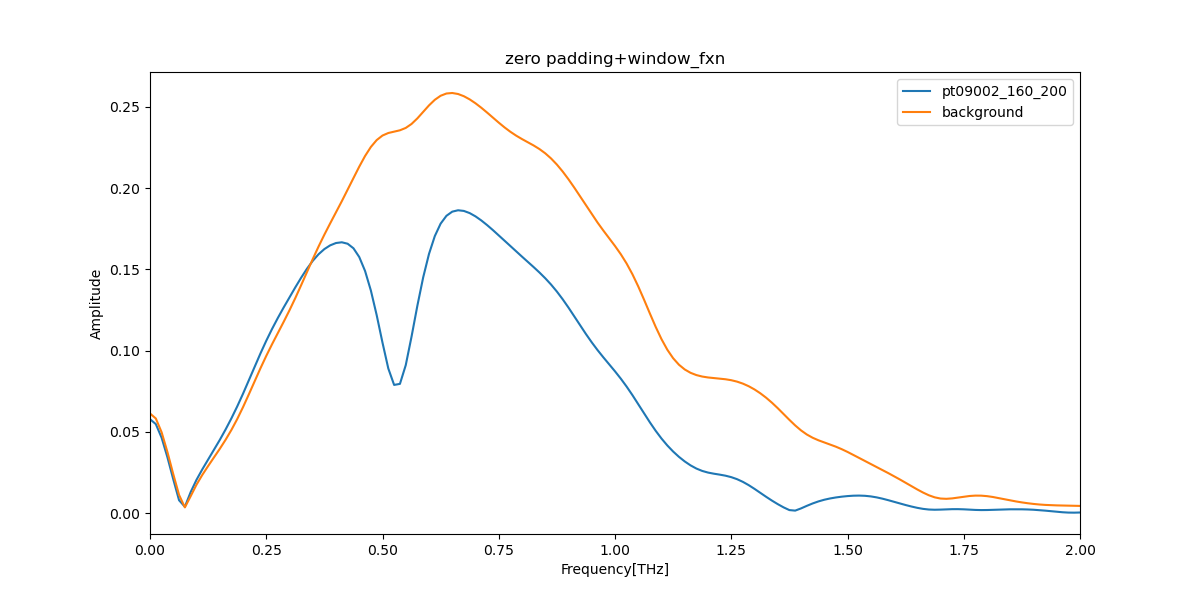

In [11]:



polycarbonate_spectrum_zp_window = np.abs(rfft(window_pc*pulse_pc_zp))   #convert time to freq
bkg_spectrum_zp_window = np.abs(rfft(window_bkg*pulse_bkg_zp))

plt.figure(figsize = (12,6))
plt.plot(freq_zp, polycarbonate_spectrum_zp_window, label = "pt09002_160_200")
plt.plot(freq_zp, bkg_spectrum_zp_window, label = "background")
           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Amplitude")
plt.title("zero padding+window_fxn")
plt.xlim(0,2)
plt.legend()

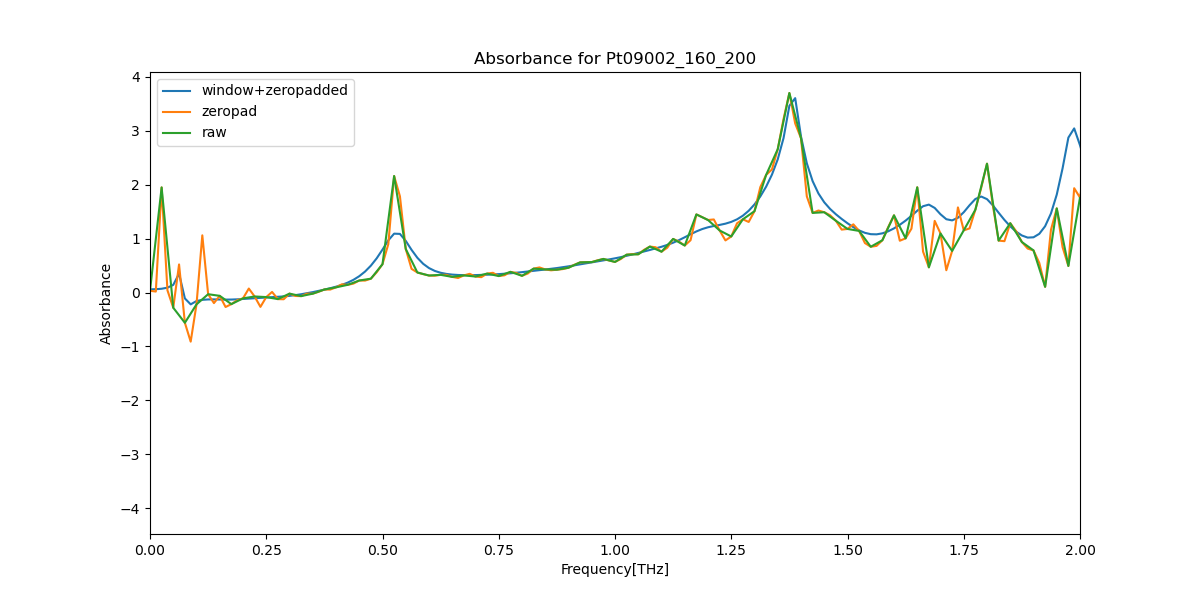

In [12]:
abs_pc_window = -np.log(polycarbonate_spectrum_zp_window/bkg_spectrum_zp_window)
plt.figure(figsize = (12,6))
plt.plot(freq_zp, abs_pc_window , label = "window+zeropadded")
plt.plot(freq_zp, abs_pc_zp, label = "zeropad")
plt.plot(freq, abs_pc , label = "raw")
           
plt.xlabel("Frequency[THz]")   
plt.ylabel("Absorbance")
plt.xlim(0,2)
plt.title("Absorbance for Pt09002_160_200")
plt.legend()